In [103]:
# Import all library needed for this project

import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [104]:
# Data Import / Collection

# Path Folder
folder_data = '../data'  
dataframes = []

# Regular expression to extract date from file name
date_pattern = r'\((\d{2}-\d{2}-\d{4})\)'

# Get All file
for file_name in os.listdir(folder_data):
    if file_name.endswith('.csv'):
        print(f"Memproses file: {file_name}")
        match = re.search(date_pattern, file_name)
        if match:
            date_str = match.group(1)
        else:
            date_str = 'Unknown' 
        file_path = os.path.join(folder_data, file_name)
        df = pd.read_csv(file_path)
        df['date_file'] = date_str
        dataframes.append(df)

merged_data = pd.concat(dataframes, ignore_index=True)
print("\nData yang digabungkan:")
print(merged_data)


Memproses file: NBA_2024_per_game(27-12-2023).csv
Memproses file: NBA_2024_per_game(15-11-2023).csv
Memproses file: NBA_2024_per_game(04-12-2023).csv
Memproses file: NBA_2024_per_game(03-01-2024).csv
Memproses file: NBA_2024_per_game(22-11-2023).csv
Memproses file: NBA_2024_per_game(26-01-2024).csv
Memproses file: NBA_2024_per_game(05-12-2023).csv
Memproses file: NBA_2024_per_game(13-11-2023).csv
Memproses file: NBA_2024_per_game(28-11-2023).csv
Memproses file: NBA_2024_per_game(20-11-2023).csv
Memproses file: NBA_2024_per_game(17-11-2023).csv

Data yang digabungkan:
                        Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0             Precious Achiuwa   C   24  TOR  23   0  18.4  3.3   7.3  0.461   
1                  Bam Adebayo   C   26  MIA  20  20  33.9  8.2  16.0  0.511   
2                 Ochai Agbaji  SG   23  UTA  30  10  21.6  2.7   5.9  0.463   
3                 Santi Aldama  PF   23  MEM  22   5  25.1  4.5  10.1  0.441   
4     Nickeil Alexander-Wa

In [105]:
# Data Validation Importing and Merged

# Check unique value for date_file column
unique_dates = merged_data['date_file'].unique()
print("Nilai unik pada kolom 'date_file':")
print(unique_dates)



# Checking whether all unique values are in the list of processed file names.
expected_dates = []
for file_name in os.listdir(folder_data):
    if file_name.endswith('.csv'):
        match = re.search(date_pattern, file_name)
        if match:
            expected_dates.append(match.group(1))

missing_dates = [date for date in expected_dates if date not in unique_dates]

if not missing_dates:
    print("\nAll dates from the file names are already present in the 'date_file' column.'.")
else:
    print("\nThe following dates were not found in the 'date_file' column.:")
    print(missing_dates)

Nilai unik pada kolom 'date_file':
['27-12-2023' '15-11-2023' '04-12-2023' '03-01-2024' '22-11-2023'
 '26-01-2024' '05-12-2023' '13-11-2023' '28-11-2023' '20-11-2023'
 '17-11-2023']

All dates from the file names are already present in the 'date_file' column.'.


In [106]:
# Data Preprocesing

# Missing Value Checking
missing_values = merged_data.isna().sum()

print("Number of Missing Value  (NaN) each kolom:")
print(missing_values)

Number of Missing Value  (NaN) each kolom:
Player         0
Pos            0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%          112
3P             0
3PA            0
3P%          633
2P             0
2PA            0
2P%          239
eFG%         112
FT             0
FTA            0
FT%          827
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
date_file      0
dtype: int64


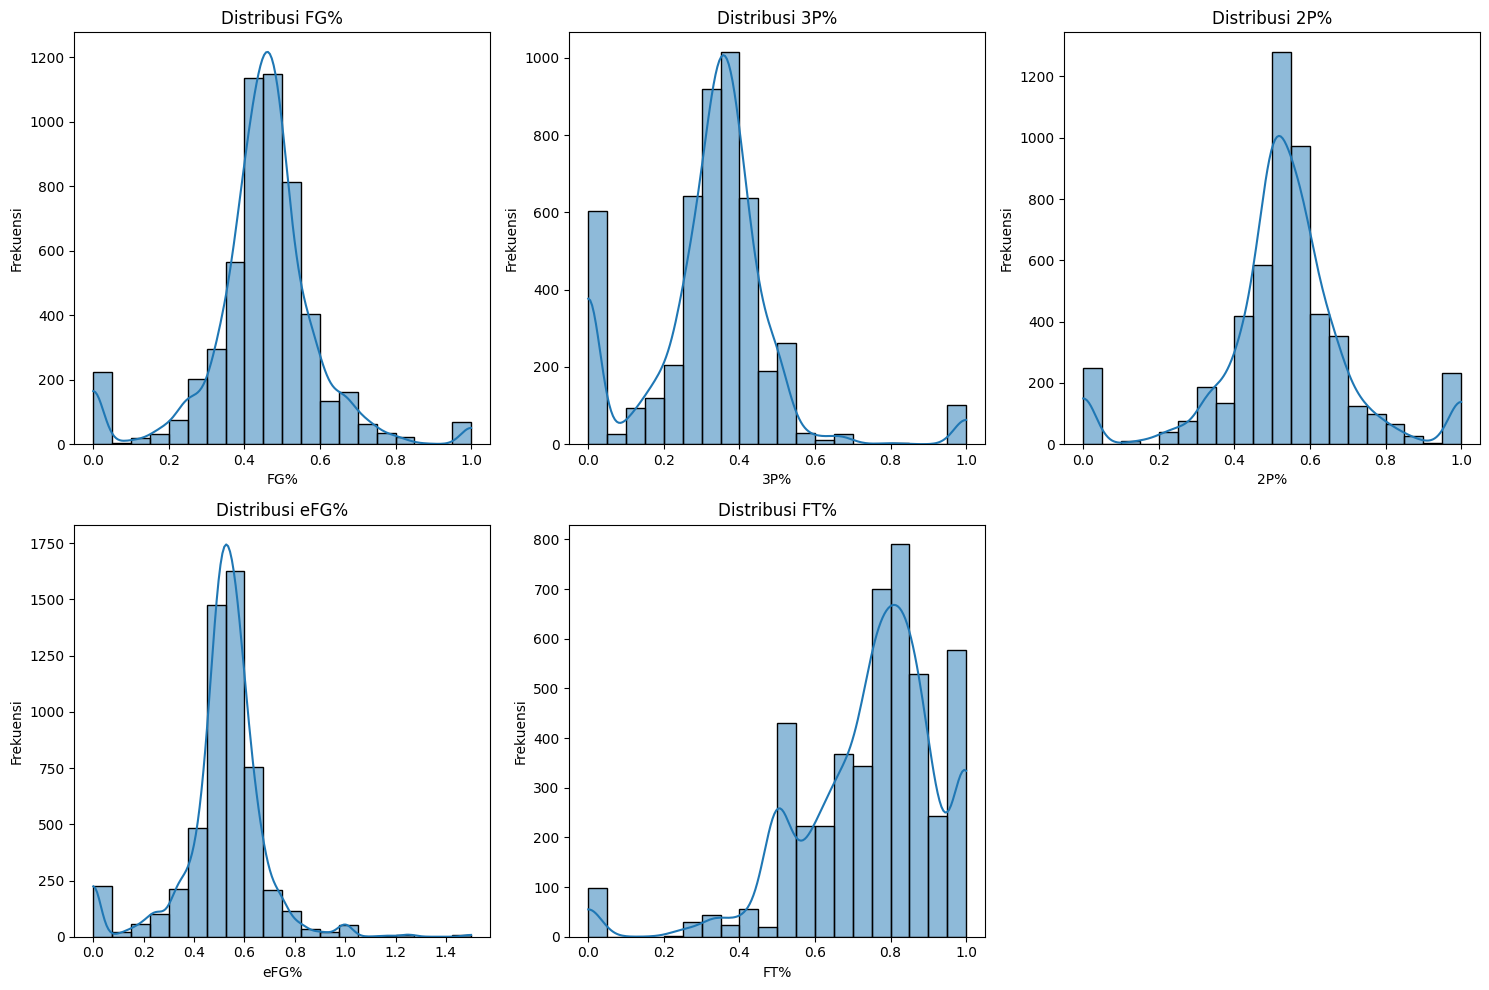

In [107]:
# Data Distribution for Missing Value Column


columns_to_plot = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(merged_data[column].dropna(), kde=True, bins=20)  
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.subplot(2, 3, len(columns_to_plot) + 1)
plt.axis('off')  

plt.tight_layout()
plt.show()


In [108]:
# Validate Score for Skewness


columns_to_test = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
normality_results = {}
skewness_results = {}


# Testing for each column.
for column in columns_to_test:
  
    # Count the skewness
    skewness = merged_data[column].dropna().skew()
    skewness_results[column] = skewness

    # Show the result of skewness
    print(f"  - Skewness: {skewness}")
    if skewness > 0:
        print("  => right-skewed.")
    elif skewness < 0:
        print("  => left-skewed.")
    else:
        print("  => Data ini simetris.")

normality_df = pd.DataFrame({
    'Skewness': skewness_results
})

print("\nSummaries of Result:")
print(normality_df)


  - Skewness: -0.28397297104415903
  => left-skewed.
  - Skewness: 0.5829400142681487
  => right-skewed.
  - Skewness: -0.3735455055137174
  => left-skewed.
  - Skewness: -0.4561770661466795
  => left-skewed.
  - Skewness: -1.3536659888606233
  => left-skewed.

Summaries of Result:
      Skewness
FG%  -0.283973
3P%   0.582940
2P%  -0.373546
eFG% -0.456177
FT%  -1.353666


In [109]:
normality_df.head()

,Skewness
FG%,-0.283973
3P%,0.582940
2P%,-0.373546
eFG%,-0.456177
FT%,-1.353666


In [110]:
# Missing Value Handling


# Replacing missing values in the column with the median if the distribution is skewed to the left.
for column in columns_to_plot:
    skewness = merged_data[column].skew()  
    if skewness < 0: 
        median_value = merged_data[column].median()  
        merged_data[column].fillna(median_value, inplace=True)  
        print(f"Column {column} skewed to left, used median for imputation.")
    else:
        mean_value = merged_data[column].mean() 
        merged_data[column].fillna(mean_value, inplace=True) 
        print(f"Column {column} distribusi normal or skewed to right, used mean for imputation.")


Column FG% skewed to left, used median for imputation.
Column 3P% distribusi normal or skewed to right, used mean for imputation.
Column 2P% skewed to left, used median for imputation.
Column eFG% skewed to left, used median for imputation.
Column FT% skewed to left, used median for imputation.


/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/730523690.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[column].fillna(median_value, inplace=True)
/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/730523690.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [111]:
# Validate Result of Missing Value

missing_values = merged_data.isna().sum()
print("Jumlah nilai missing (NaN) per kolom:")
print(missing_values)


Jumlah nilai missing (NaN) per kolom:
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
date_file    0
dtype: int64


In [112]:
# Data Duplicate Handling


duplicates_rows = merged_data.duplicated()
print(f"Jumlah baris yang duplikat: {duplicates_rows.sum()}")



Jumlah baris yang duplikat: 0


In [113]:
# Data Consistency Handling


# Checking the data types across the entire `merged_data`.
print(merged_data.dtypes)
columns_data_types = merged_data.dtypes

inconsistent_columns = []

for column in columns_data_types.index:
    if merged_data[column].dtype != columns_data_types[column]:
        inconsistent_columns.append(column)

if inconsistent_columns:
    print("\nThere are columns with inconsistent data types.")
    for column in inconsistent_columns:
        print(f"  - Column: {column} with data type: {merged_data[column].dtype}")
else:
    print("\nAll columns have consistent data types across the entire `merged_data`")

Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
date_file     object
dtype: object

All columns have consistent data types across the entire `merged_data`


/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/4262732445.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_players, x='PTS', y='Player', palette='cividis')


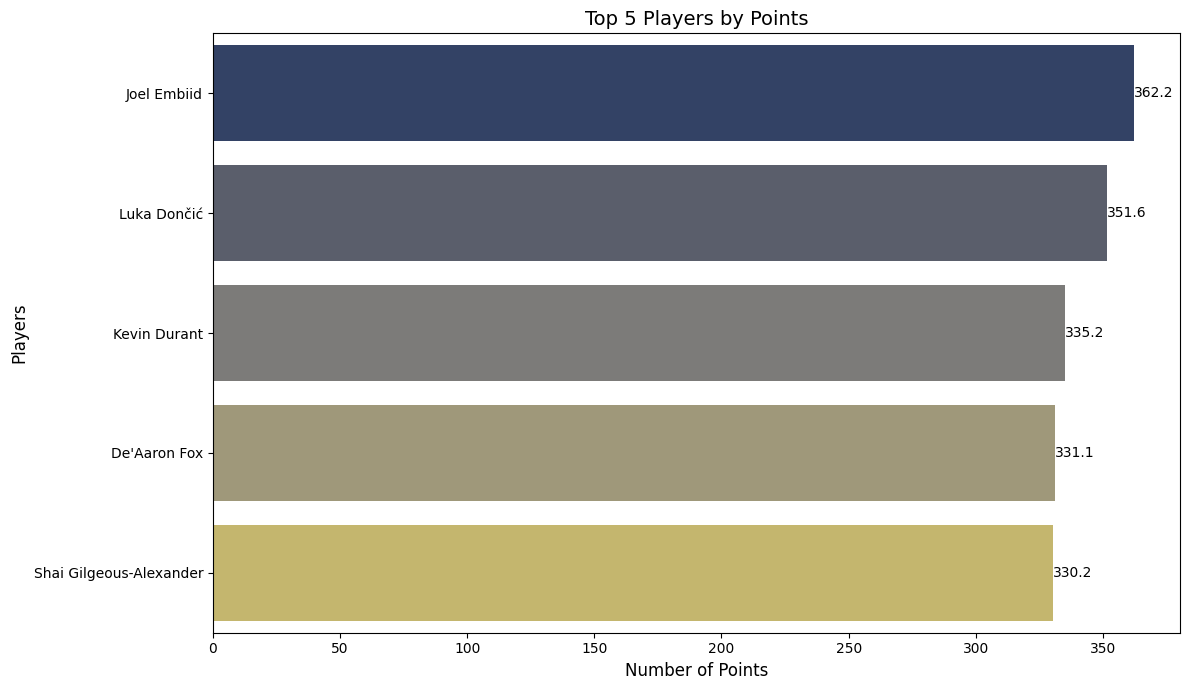

In [114]:
# Top 5 Players based on Points


total_points_per_player = merged_data.groupby('Player')['PTS'].sum().reset_index()
total_points_per_player = total_points_per_player.sort_values(by='PTS', ascending=False)
top_5_players = total_points_per_player.head(5)


# Plot Top 5 Players
plt.figure(figsize=(12, 7))
sns.barplot(data=top_5_players, x='PTS', y='Player', palette='cividis')
for index, value in enumerate(top_5_players['PTS']):
    plt.text(value, index, f'{value}', color='black', ha='left', va='center')
plt.title('Top 5 Players by Points', fontsize=14)
plt.xlabel('Number of Points', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.tight_layout()
plt.show()

In [115]:
# Aggregating total PPG, APG, RPG for each player
total_performance = merged_data.groupby('Player').agg({
    'PTS': 'sum',
    'AST': 'sum',
    'ORB': 'sum',
    'DRB': 'sum'
}).reset_index()


total_performance_sorted = total_performance.sort_values('PTS', ascending=False)
top_10_players = total_performance_sorted.head(10)
top_10_players


,Player,PTS,AST,ORB,DRB
263,Joel Embiid,362.2,66.6,34.3,91.4
349,Luka Dončić,351.6,94.0,7.9,83.1
315,Kevin Durant,335.2,58.9,4.6,69.7
114,De'Aaron Fox,331.1,66.3,11.4,36.6
469,Shai Gilgeous-Alexander,330.2,67.9,8.8,59.5
172,Giannis Antetokounmpo,330.1,51.7,27.7,87.1
477,Stephen Curry,321.9,46.4,8.0,43.1
132,Devin Booker,318.8,99.2,10.2,55.1
405,Nikola Jokić,311.1,98.5,35.3,108.1
140,Donovan Mitchell,310.2,59.9,11.0,46.0


<Figure size 1000x600 with 0 Axes>

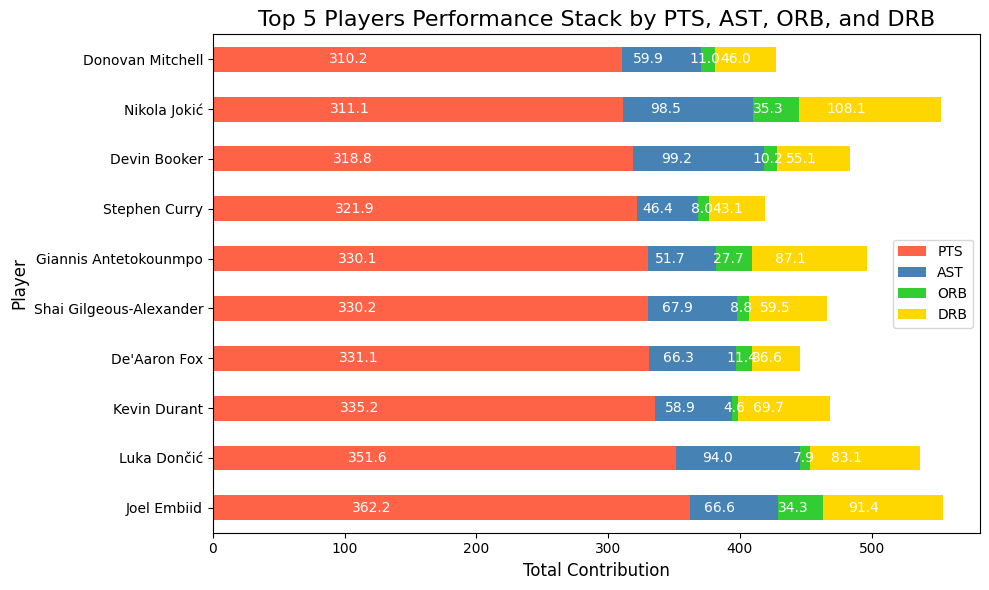

In [116]:
# Top 5 Players Performance Stack by PTS, AST, ORB, and DRB


top_5_players = total_performance_sorted.head(5)

plt.figure(figsize=(10, 6))
ax = top_10_players.set_index('Player')[['PTS', 'AST', 'ORB', 'DRB']].plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])


for i in range(top_10_players.shape[0]):
    width = 0
    for metric, color in zip(['PTS', 'AST', 'ORB', 'DRB'], ['#FF6347', '#4682B4', '#32CD32', '#FFD700']):
        value = top_10_players.iloc[i][metric]
        ax.text(width + value / 3, i, f'{value:.1f}', ha='center', va='center', color='white', fontsize=10)
        width += value  


plt.title('Top 5 Players Performance Stack by PTS, AST, ORB, and DRB', fontsize=16)
plt.xlabel('Total Contribution', fontsize=12)
plt.ylabel('Player', fontsize=12)


plt.tight_layout()
plt.show()


/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/3205709483.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Adjusted_PTS'] = player_data['PTS'] + offset
/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/3205709483.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Adjusted_PTS'] = player_data['PTS'] + offset
/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/3205709483.py:21: SettingWithCopyWarning: 
A value is trying to be set on a 

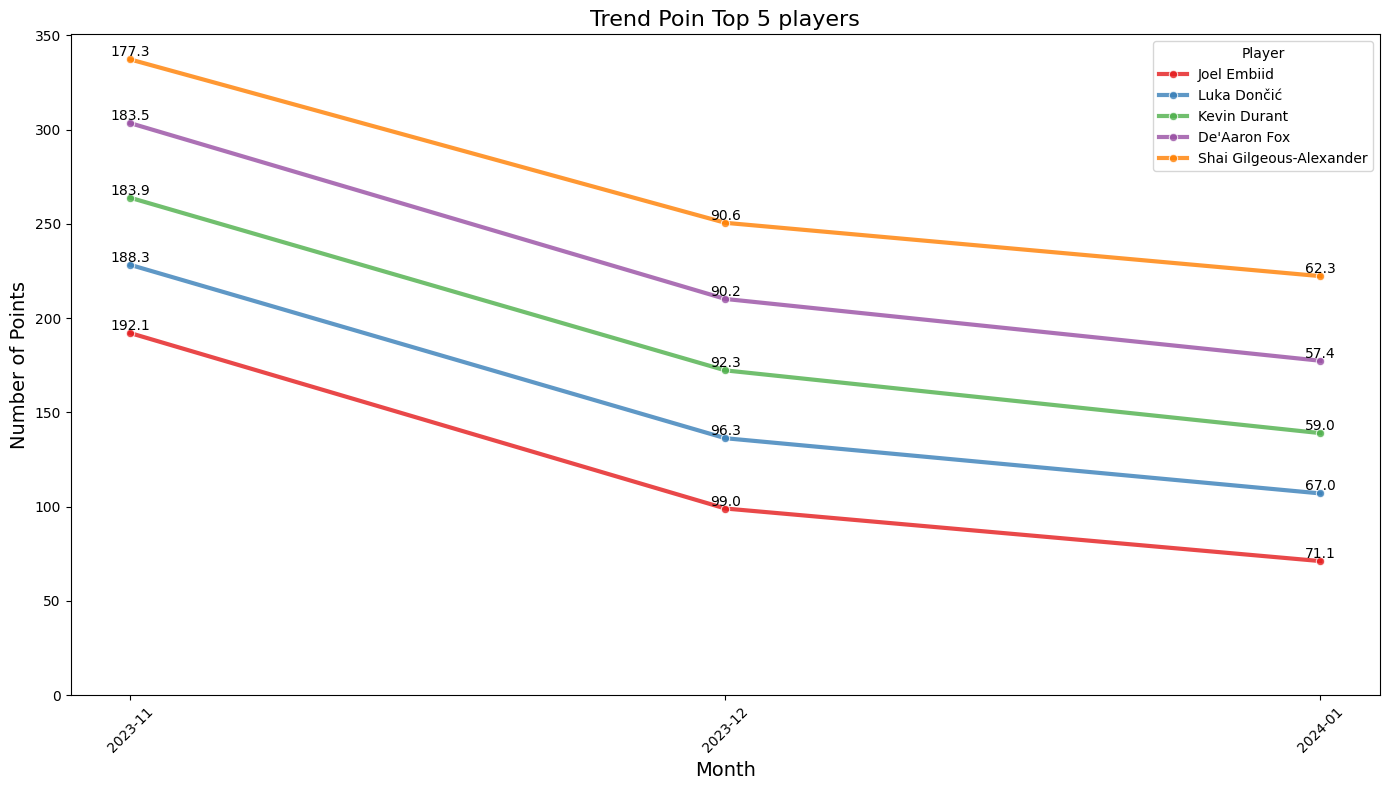

In [117]:

# Trend line Top 5 Players Performance by Point


merged_data['date_file'] = pd.to_datetime(merged_data['date_file'], format='%d-%m-%Y')
merged_data['Month'] = merged_data['date_file'].dt.to_period('M')  # Use to_period('M') for month-year

total_points = merged_data.groupby('Player')['PTS'].sum().reset_index()
top_5_players = total_points.nlargest(5, 'PTS')['Player'].tolist()
filtered_data = merged_data[merged_data['Player'].isin(top_5_players)]
monthly_points = filtered_data.groupby(['Player', 'Month'])['PTS'].sum().reset_index()
monthly_points['Month'] = monthly_points['Month'].astype(str)



offset = 0
adjusted_points = []  


for player in top_5_players:
    player_data = monthly_points[monthly_points['Player'] == player]
    player_data['Adjusted_PTS'] = player_data['PTS'] + offset
    adjusted_points.append(player_data)
    offset += 40  


adjusted_monthly_points = pd.concat(adjusted_points)


plt.figure(figsize=(14, 8))
sns.lineplot(data=adjusted_monthly_points, x='Month', y='Adjusted_PTS', hue='Player', marker='o', palette='Set1', linewidth=3, alpha=0.8)
for player in top_5_players:
    player_data = adjusted_monthly_points[adjusted_monthly_points['Player'] == player]
    for index, row in player_data.iterrows():
        plt.text(row['Month'], row['Adjusted_PTS'], f'{row["PTS"]}', color='black', fontsize=10, 
                 verticalalignment='bottom', horizontalalignment='center')

plt.title('Trend Poin Top 5 players', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Points', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/496993560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_players, x='AST', y='Player', palette='viridis')


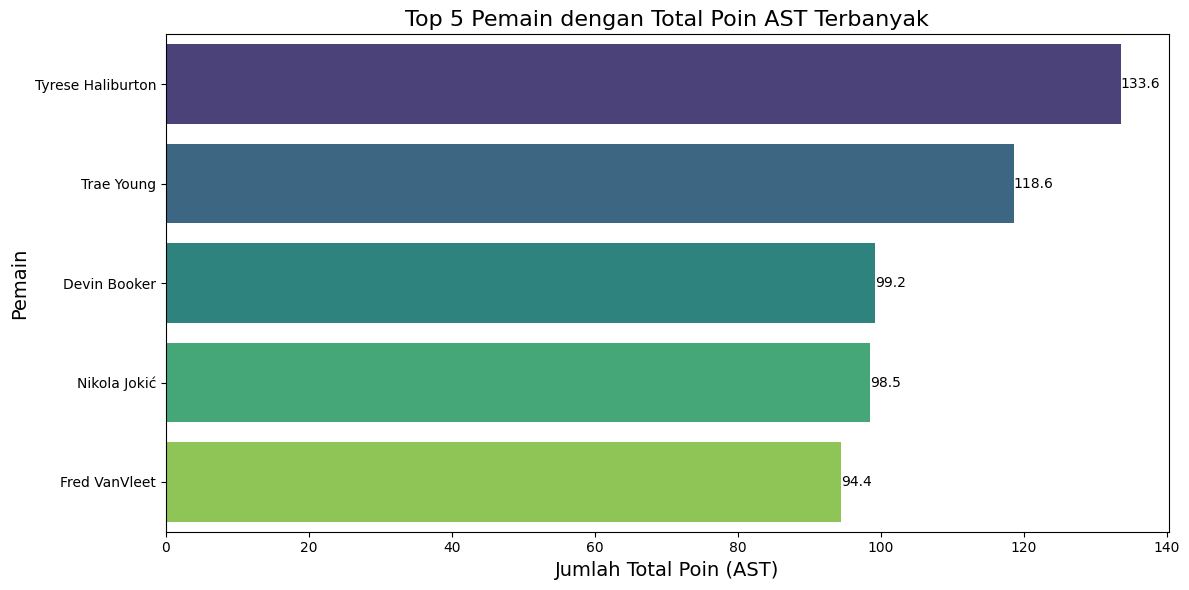

In [118]:
# Top 5 Pemain dengan Total Poin AST Terbanyak

# Menghitung total poin per pemain
total_points_per_player = merged_data.groupby('Player')['AST'].sum().reset_index()
total_points_per_player = total_points_per_player.sort_values(by='AST', ascending=False)

top_5_players = total_points_per_player.head(5)


# Plot Top 5 Players
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_players, x='AST', y='Player', palette='viridis')
for index, value in enumerate(top_5_players['AST']):
    plt.text(value, index, f'{value}', color='black', ha='left', va='center')
plt.title('Top 5 Pemain dengan Total Poin AST Terbanyak', fontsize=16)
plt.xlabel('Jumlah Total Poin (AST)', fontsize=14)
plt.ylabel('Pemain', fontsize=14)
plt.tight_layout()
plt.show()
#

/var/folders/wt/7s83ldm550z_m3ky56m8z_580000gn/T/ipykernel_8803/139307791.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_players, x='TRB', y='Player', palette='viridis')


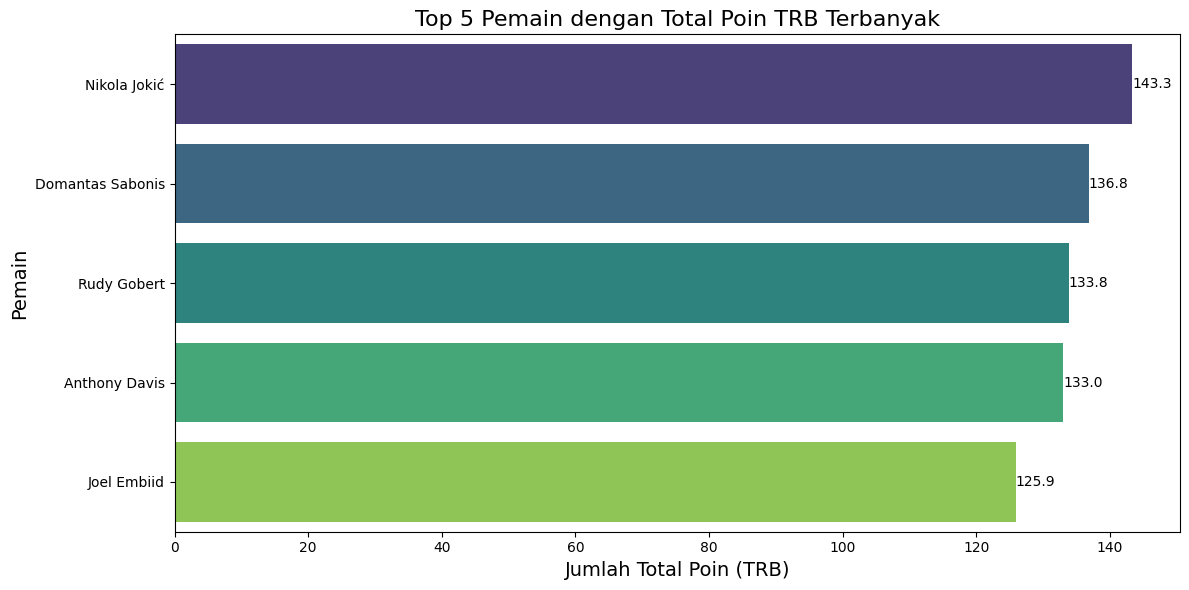

In [119]:
# Top 5 Pemain dengan Total Poin TRB Terbanyak


total_points_per_player = merged_data.groupby('Player')['TRB'].sum().reset_index()
total_points_per_player = total_points_per_player.sort_values(by='TRB', ascending=False)
top_5_players = total_points_per_player.head(5)


# Plot Top 10 Players
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_players, x='TRB', y='Player', palette='viridis')
for index, value in enumerate(top_5_players['TRB']):
    plt.text(value, index, f'{value}', color='black', ha='left', va='center')
plt.title('Top 5 Pemain dengan Total Poin TRB Terbanyak', fontsize=16)
plt.xlabel('Jumlah Total Poin (TRB)', fontsize=14)
plt.ylabel('Pemain', fontsize=14)
plt.tight_layout()
plt.show()


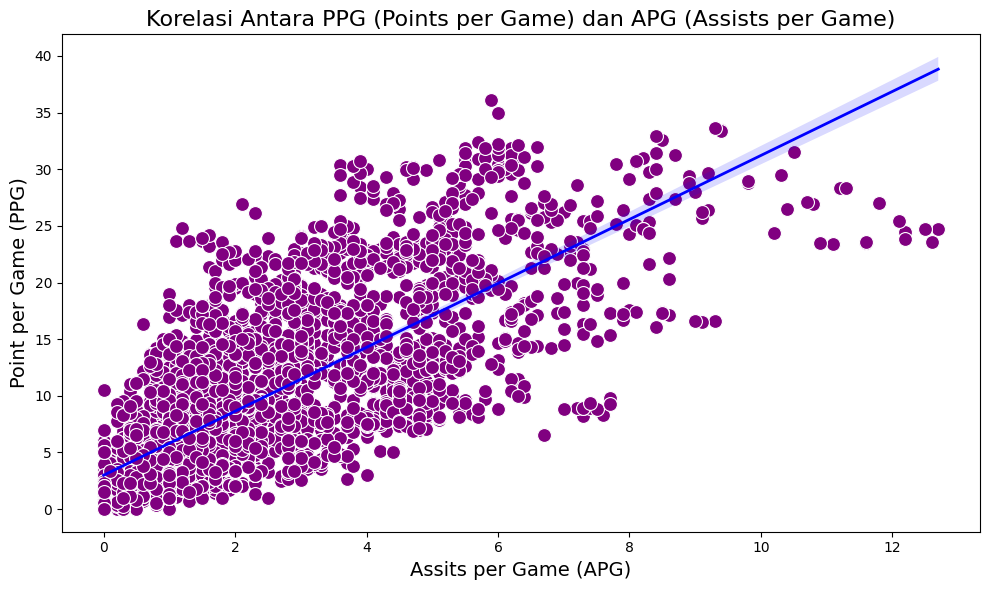

Korelasi antara PPG dan APG: 0.76


In [120]:
# Korelasi Antara PPG (Points per Game) dan APG (Assists per Game)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='AST', y='PTS', s=100, color='purple')
sns.regplot(data=merged_data, x='AST', y='PTS', scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('Korelasi Antara PPG (Points per Game) dan APG (Assists per Game)', fontsize=16)
plt.xlabel('Assits per Game (APG)', fontsize=14)
plt.ylabel('Point per Game (PPG)', fontsize=14)
plt.tight_layout()
plt.show()
correlation = merged_data[['AST', 'PTS']].corr().iloc[0, 1]
print(f'Korelasi antara PPG dan APG: {correlation:.2f}')


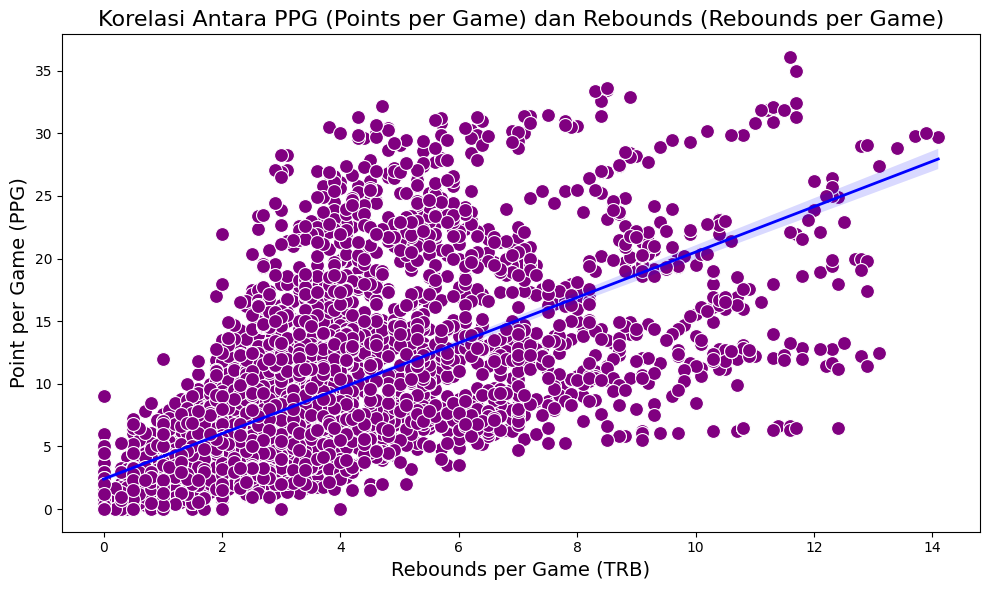

Korelasi antara PPG dan APG: 0.65


In [121]:
# Korelasi Antara PPG (Points per Game) dan Rebounds (Rebounds per Game)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='TRB', y='PTS', s=100, color='purple')
sns.regplot(data=merged_data, x='TRB', y='PTS', scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('Korelasi Antara PPG (Points per Game) dan Rebounds (Rebounds per Game)', fontsize=16)
plt.xlabel('Rebounds per Game (TRB)', fontsize=14)
plt.ylabel('Point per Game (PPG)', fontsize=14)
plt.tight_layout()
plt.show()
correlation = merged_data[['TRB', 'PTS']].corr().iloc[0, 1]
print(f'Korelasi antara PPG dan APG: {correlation:.2f}')


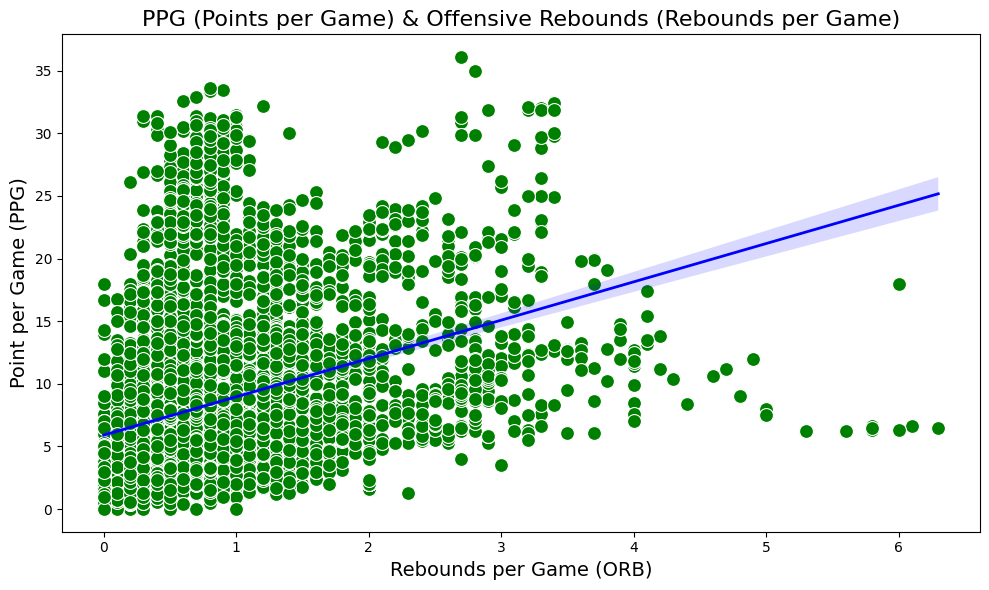

Korelasi antara PPG dan ORB: 0.36


In [122]:
# PPG (Points per Game) & Offensive Rebounds (Rebounds per Game)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='ORB', y='PTS', s=100, color='green')
sns.regplot(data=merged_data, x='ORB', y='PTS', scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('PPG (Points per Game) & Offensive Rebounds (Rebounds per Game)', fontsize=16)
plt.xlabel('Rebounds per Game (ORB)', fontsize=14)
plt.ylabel('Point per Game (PPG)', fontsize=14)
plt.tight_layout()
plt.show()
correlation = merged_data[['ORB', 'PTS']].corr().iloc[0, 1]
print(f'Korelasi antara PPG dan ORB: {correlation:.2f}')


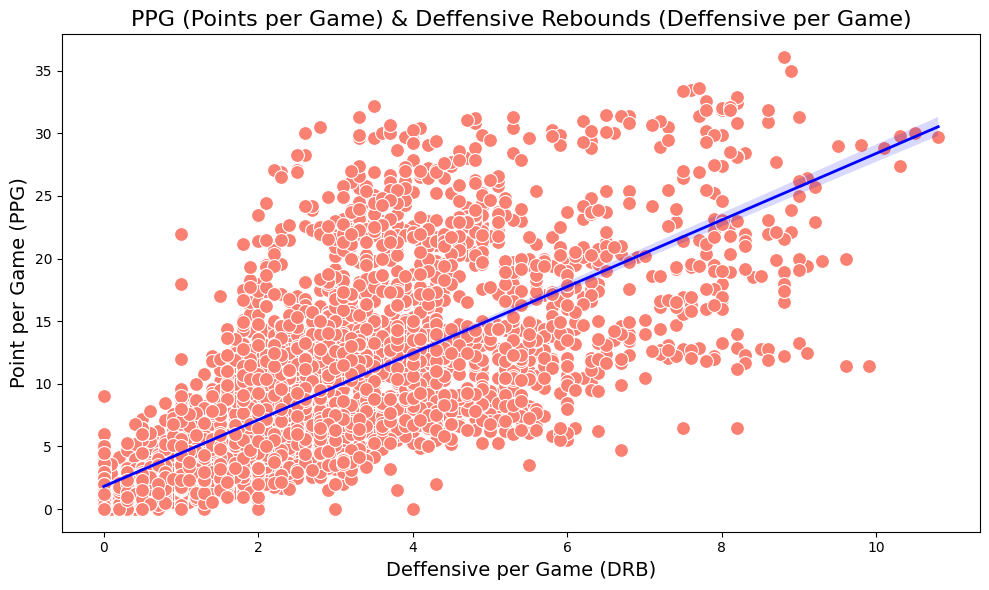

Korelasi antara PPG dan DRB: 0.72


In [123]:
# Plotting scatter plot untuk PPG (PTS) vs APG (AST)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='DRB', y='PTS', s=100, color='salmon')
sns.regplot(data=merged_data, x='DRB', y='PTS', scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('PPG (Points per Game) & Deffensive Rebounds (Deffensive per Game)', fontsize=16)
plt.xlabel('Deffensive per Game (DRB)', fontsize=14)
plt.ylabel('Point per Game (PPG)', fontsize=14)
plt.tight_layout()
plt.show()
correlation = merged_data[['DRB', 'PTS']].corr().iloc[0, 1]
print(f'Korelasi antara PPG dan DRB: {correlation:.2f}')


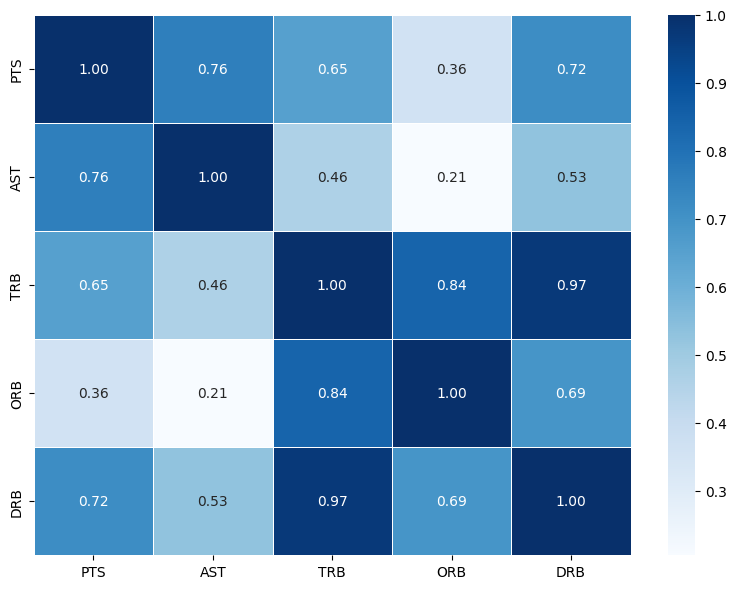

In [124]:
# Menghitung korelasi antar metrik (PTS, AST, TRB)
correlation_matrix = merged_data[['PTS', 'AST', 'TRB','ORB','DRB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()


In [125]:
# Modeling for Prediction using Linear Regression


merged_data['date_file'] = pd.to_datetime(merged_data['date_file'], format='%d-%m-%Y')
merged_data['Month'] = merged_data['date_file'].dt.month
merged_data['Year'] = merged_data['date_file'].dt.year.astype(int)
merged_data = merged_data[merged_data['Month'].isin([11, 12, 1])]

# Prepare the dataset to aggregate points by Player, Year, and Month
monthly_points = merged_data.groupby(['Player', 'Year', 'Month'])[['PTS', 'AST', 'ORB', 'DRB']].sum().reset_index()

# Map month numbers to descriptive names (November = 1, December = 2, January = 3)
month_map = {11: 'November', 12: 'December', 1: 'January'}
monthly_points['Month'] = monthly_points['Month'].map(month_map)

# Filter out any rows where the month wasn't one of November, December, or January
monthly_points = monthly_points[monthly_points['Month'].notna()]

# Aggregate total points by player for the months of November, December, and January
player_total_pts = monthly_points.groupby('Player')['PTS'].sum().reset_index()

# Sort players by total points and select top 5 players
top_5_players = player_total_pts.sort_values(by='PTS', ascending=False).head(5)
df_top_5 = merged_data[merged_data['Player'].isin(top_5_players['Player'])]

# prediction results for February (next month after January)
prediction_results = []

# List of predictions for each player (for February)
for player in top_5_players['Player']:
   
    player_data = merged_data[merged_data['Player'] == player]
    X = player_data[['Month', 'AST', 'ORB', 'DRB']]  # Adding AST, ORB, DRB as features
    y = player_data['PTS']  # Dependent variable: Points (PTS)
    
    # Train the model (Linear Regression)
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for February (next month after January)
    next_game_month = 2  # February is month 2
    predicted_ast = player_data['AST'].mean()  # Average AST value for prediction
    predicted_orb = player_data['ORB'].mean()  # Average ORB value for prediction
    predicted_drb = player_data['DRB'].mean()  # Average DRB value for prediction
    
    # Predict the points for February
    predicted_pts = model.predict(np.array([[next_game_month, predicted_ast, predicted_orb, predicted_drb]]))  
    prediction_results.append({
        'Player': player,
        'Month': 'February',
        'Predicted_PTS_Next_Game': predicted_pts[0],
        'Year': 2024
    })
predictions_df = pd.DataFrame(prediction_results)



# Combine historical and predicted data
final_results = []

# Loop through each player to combine their historical and predicted data
for player in top_5_players['Player']:
    player_data = monthly_points[monthly_points['Player'] == player]
    final_results.append(player_data)
    
    # Add predicted data for February
    predicted_data = {
        'Player': player,
        'Month': 'February',  # The predicted month
        'PTS': predictions_df[predictions_df['Player'] == player]['Predicted_PTS_Next_Game'].values[0],
        'Year': 2024
    }
    
    final_results.append(pd.DataFrame([predicted_data]))

# Combine the historical and predicted data
final_df = pd.concat(final_results, ignore_index=True)


offset = 0  # Start with no offset
adjusted_points = []
for player in top_5_players['Player']:
    player_data = final_df[final_df['Player'] == player]
    player_data['Adjusted_PTS'] = player_data['PTS'] + offset  # Apply offset to PTS
    adjusted_points.append(player_data)  # Append the adjusted data
    offset += 15  # Increase offset for the next player (adjust as needed)

# Combine the adjusted data into one DataFrame
adjusted_final_df = pd.concat(adjusted_points, ignore_index=True)


/Users/dedisamosir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/dedisamosir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/dedisamosir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/dedisamosir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/dedisamosir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature 

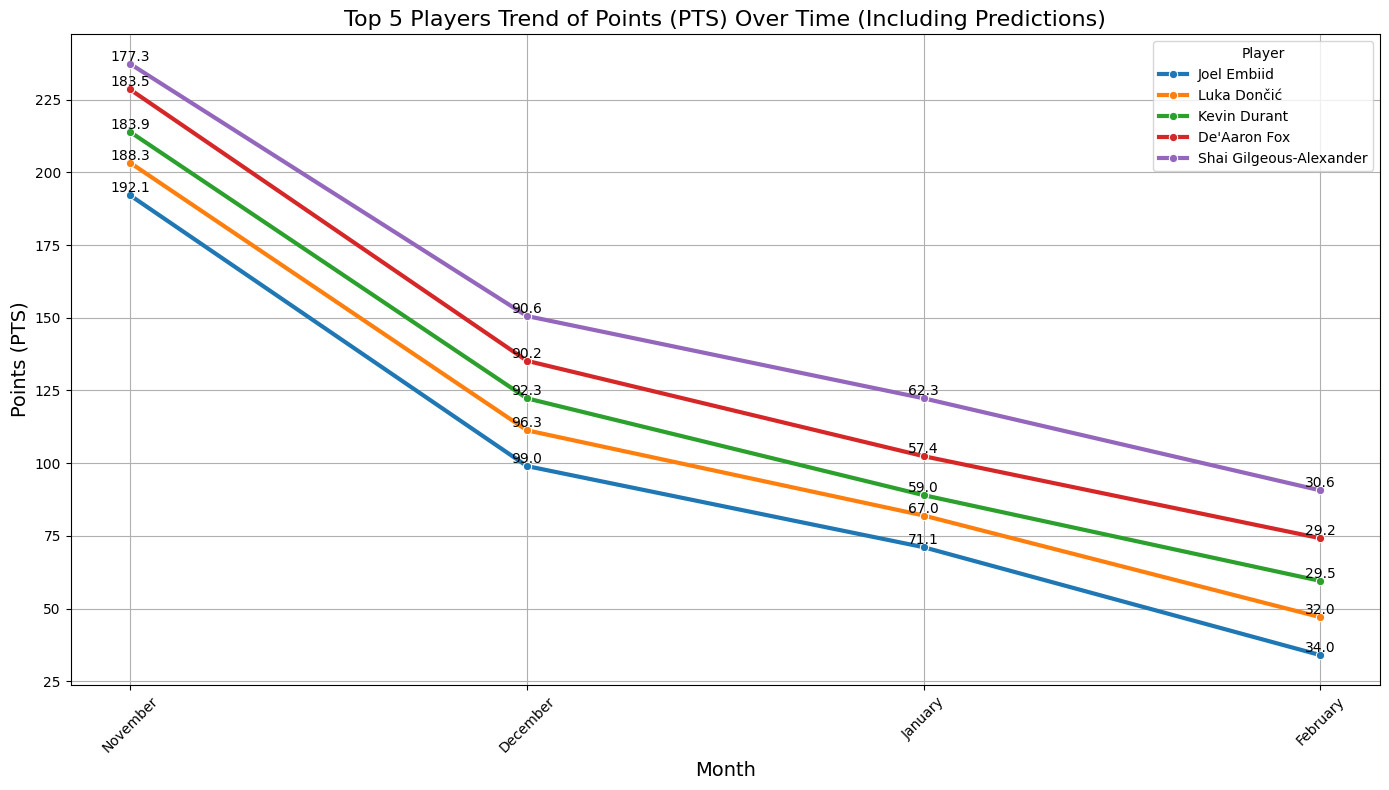

In [126]:
# Visualization Results

plt.figure(figsize=(14, 8))
sns.lineplot(data=adjusted_final_df, x='Month', y='Adjusted_PTS', hue='Player', marker='o', linewidth=3)


for player in top_5_players['Player']:
    player_data = adjusted_final_df[adjusted_final_df['Player'] == player]
    for i, row in player_data.iterrows():
        plt.text(row['Month'], row['Adjusted_PTS'], f'{row["PTS"]:.1f}', color='black', ha='center', va='bottom', fontsize=10)


plt.title('Top 5 Players Trend of Points (PTS) Over Time (Including Predictions)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Points (PTS)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# Evaluate model performance (MSE and RMSE)

total_mse = 0
total_rmse = 0
num_players = len(top_5_players)


for player in top_5_players['Player']:
    player_data = merged_data[merged_data['Player'] == player]
    X = player_data[['Month', 'AST', 'ORB', 'DRB']]
    y = player_data['PTS']
    
    # Train the model (Linear Regression)
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict on the historical data
    y_pred = model.predict(X)
    
    # Calculate MSE and RMSE for the current player
    mse = mean_squared_error(y, y_pred)
    rmse = math.sqrt(mse)
    
    # Accumulate MSE and RMSE
    total_mse += mse
    total_rmse += rmse

# Calculate average MSE and RMSE across all players
average_mse = total_mse / num_players
average_rmse = total_rmse / num_players

# Print out the model evaluation summary
print(f"Summary Evaluation of Model Performance:")
print(f"Average MSE across all players: {average_mse:.4f}")
print(f"Average RMSE across all players: {average_rmse:.4f}")


Summary Evaluation of Model Performance:
Average MSE across all players: 0.2167
Average RMSE across all players: 0.3968


In [128]:
final_df.head(100)

,Player,Year,Month,PTS,AST,ORB,DRB
0,Joel Embiid,2023,November,192.100000,35.5,19.4,48.8
1,Joel Embiid,2023,December,99.000000,19.2,9.4,24.9
2,Joel Embiid,2024,January,71.100000,11.9,5.5,17.7
3,Joel Embiid,2024,February,33.979734,NaN,NaN,NaN
4,Luka Dončić,2023,November,188.300000,49.1,4.0,44.9
5,Luka Dončić,2023,December,96.300000,26.2,2.3,23.0
6,Luka Dončić,2024,January,67.000000,18.7,1.6,15.2
7,Luka Dončić,2024,February,32.039704,NaN,NaN,NaN
8,Kevin Durant,2023,November,183.900000,30.1,2.7,39.7
9,Kevin Durant,2023,December,92.300000,17.1,1.0,18.2
